<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and regression modeling for a case study: Predict house price range in Hanoi 2019 and 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Student Name: Do Hoang Duc (s3788345)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard.

# Hypothesis forming:


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets
****

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# # run a python file
# %run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')


In [2]:
# check the version of the packages
print(np.__version__)
print(pd.__version__)

1.20.1
1.2.4


<p> In order to have an accurate result, data prepration step must be done precisely. First of all, data from the csv file which is named "VN_housing_dataset.csv" is loaded by "read_csv" in pandas function. After that, all the data types must be checked to ensure no column has incorrect data types assigned. Having been checked the data types, the loaded data is cleaned by 6 steps which are typos, extra-whitespaces, upper/lower-case, sanity checks, missing values, and categorical data </p>

# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
%time
# import test dataset
df = pd.read_csv('Data/VN_housing_dataset.csv', delimiter=',', skipinitialspace = True)
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The 'Ngày' will be the date which will contain all the day, month, year value
- The 'Địa chỉ' will be the address which contains the street, ward, district, city
- The 'Quận' is district
- The 'Huyện' is not suppose to be the ward. However, the content they have is actually the ward
- The 'Loại hình nhà ở' is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The 'Giấy tờ pháp lý' is the legal document either already have, or on waiting, or others documents.
- The 'Số tầng' is the number of floor
- The 'Số phòng ngủ' is the number of bedroom
- The 'Diện tích' is the area unit in meter square
- The 'Dài' is the length unit in meter
- The 'Rộng' is the width unit in meter
- The 'Giá/m2' is the price in million VND per meter square

In [4]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

## About This Dataset
***

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...
***
**Categorical:**
- **Nominal**
    > - **Address**
    > - **District**
    > - **Ward**
    > - **Housing_type**
    > - **Legal_documents**
- **Ordinal**
    > - **No_room**
    > - **No_floor**
***
**Numeric:**
- **Continuous**
  >  - **Area**
  >  - **Length**
  >  - **Width**  
  >  - **Price**
***
**Date/time:**
- **Date**(Nominal variable)

## Data types
***

### Change data types

In [5]:
# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


In [6]:
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

### Remove prefix & Typo check

In [7]:
df['District'] = df['District'].replace('Quận\s', '', regex=True)
# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [8]:
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

In [9]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [10]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [11]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





In [12]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





### Translate the content

In [13]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


### Lowercase

In [14]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


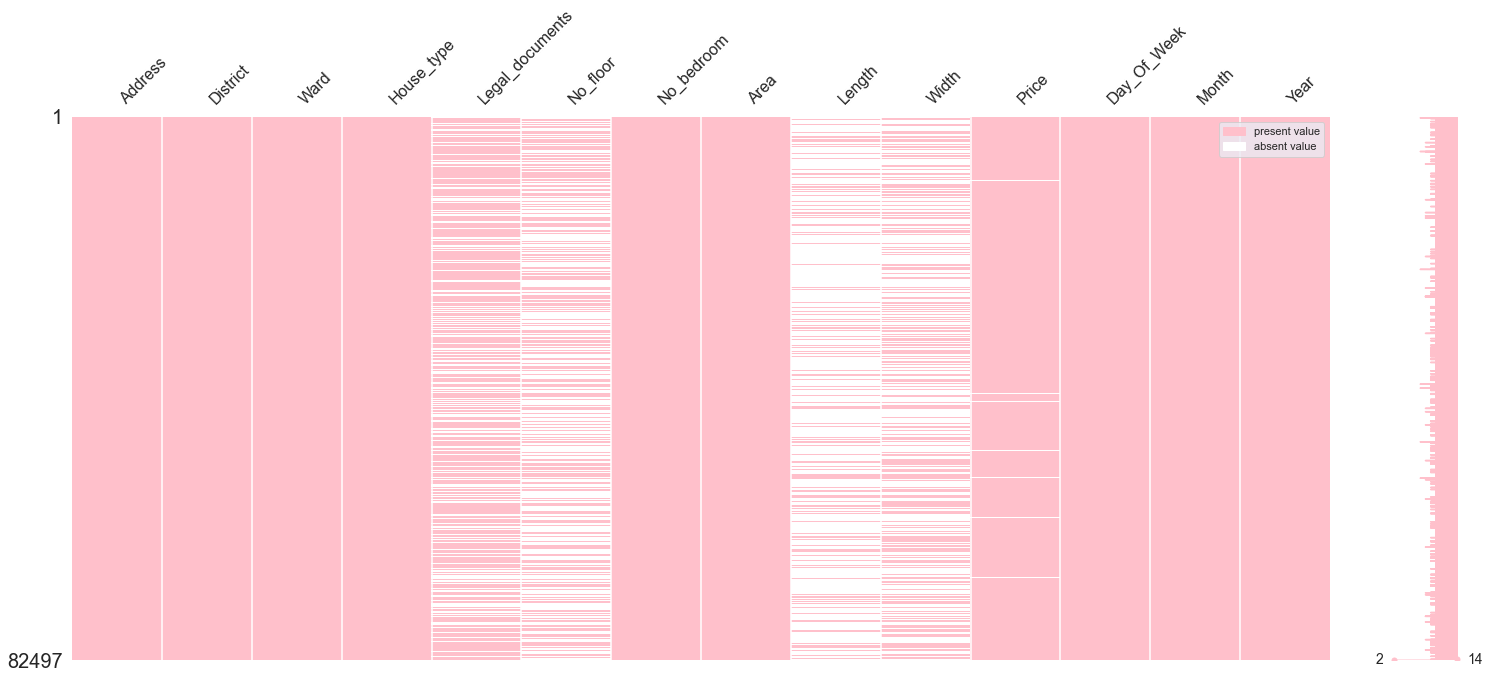

In [15]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `No_floor`, `Length` and `Width`.


<hr>

In [16]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
***
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [17]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [18]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)
# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [19]:
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: Day_Of_Week, dtype: Int64

In [20]:
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [21]:
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [22]:
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

In [23]:
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [24]:
df['House_type'].value_counts(dropna=False)
df['House_type'].fillna("BYROAD", inplace=True)

In [25]:
df[['Address', 'Ward', 'District']][df['District'].isna()]

,Address,Ward,District


In [26]:
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


As you can see the address is not specific location. Hence, there is no specific ward because a street can have multiple ward. Thus, we should only fill the missing value with None.

In [27]:
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
38                     2
12                     2
50                     2
55                     1
29                     1
42                     1
54                     1
65                     1
40                     1
33                     1
14                     1
73                     1
30                     1
52                     1
25                     1
32                     1
Name: No_floor, dtype: Int64

In [28]:
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [29]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [30]:
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

In [31]:
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [32]:
#Different Location have different housing area
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

# df['Number_of_room'] = df.groupby('Area')['Number_of_room'].apply(lambda x: x.fillna(x.median()))
df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
df['Width'].fillna(df['Width'].mean(), inplace=True)

In [33]:
df['Street'] = df['Address'].str.split(',', expand=True)[0]
df['Street'] = df['Street'].replace('ĐƯỜNG\s', '', regex=True)
df['Street'] = df['Street'].replace('PHỐ\s', '', regex=True)
df['Street'].unique()

<StringArray>
[                   'ĐƯỜNG HOÀNG QUỐC VIỆT',
                          'ĐƯỜNG KIM GIANG',
                            'PHỐ MINH KHAI',
                           'ĐƯỜNG VÕNG THỊ',
                            'ĐƯỜNG YÊN HÒA',
                            'ĐƯỜNG TÂY SƠN',
                             'ĐƯỜNG LÒ ĐÚC',
                            'ĐƯỜNG XUÂN LA',
                               'ĐƯỜNG 19/5',
                           'ĐƯỜNG TỰU LIỆT',
 ...
                       'ĐƯỜNG TRẦN CAO VÂN',
                                   '68/114',
                                    'TÚ MƠ',
                                  'NGÕ 127',
                                '15/22/269',
                         'SỐ 9 NGÕ 211/229',
                'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',
              'ĐƯỜNG LÊ TRỌNG TẤN HOÀI ĐỨC',
               'ĐƯỜNG LẠC LONG QUÂN TÂY HỒ',
 'SỐ 7 ĐƯỜNG ĐẠI LỘ THĂNG LONG NAM TỪ LIÊM']
Length: 5171, dtype: string

In [34]:
df.drop('Address', 1, inplace=True)

In [35]:
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Year               0
Street             0
dtype: int64

## Extra-whitespaces

In [36]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

whitespace_remover(df)

### ----------> OBSERVATION
<hr>

> There is no typo left

<hr>

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
***
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [37]:
# df
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82494
Number of duplicated records in df:  1285
Number of rows after drop of duplicates in df: 81209 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81209 entries, 0 to 82495
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81209 non-null  string 
 1   Ward             81209 non-null  string 
 2   House_type       81209 non-null  string 
 3   Legal_documents  81209 non-null  string 
 4   No_floor         81209 non-null  string 
 5   No_bedroom       81209 non-null  string 
 6   Area             81209 non-null  Float64
 7   Length           81209 non-null  Float64
 8   Width            81209 non-null  Float64
 9   Price            81209 non-null  Float64
 10  Day_Of_Week      81209 non-null  string 
 11  Month            81209 non-null  Int32  
 12  Year             81209 non-null  Int32  
 13  Street           81209 non-null  string 
dt

In [38]:
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Year', 'Street'],
      dtype='object')

## 2.6.2 Dealing with outliers
***
Although, there are maybe some outliers in some columns which are "Area", "Length", "Width" and "Price_per_metersquare" column, in this scenario, they should not be deleted since the target of this report is to find which housing area are safe, ideal or dangerous to buy. Those outliers and imposible values should be considered as "dangerous" to buy.

# Part 3. Visualization and Feature Relations
***
Before we dive into finding relations between independent variables and our dependent variable(Price_per_metersquare), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:** 

- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- Villa house should have the higest amount of money
- Surburban should have the more optimised option for the consumers


Now, let's see how the features are related to each other by creating some visualizations. 
****
## Some domain knowledge:
***
1. **Housing_type**: 
> In the same street, the lane house should be cheeper than the Frontage or Villa house, but in some cases they have more advantages since the rules for building them is not as restricted as the Frontage or Villa house.

2. **Number of Floor**: 
- **The Land lot with an area of 30m2 to less than 40m2** : With a facade width greater than 3m, a depth of more than 5m compared to the construction boundary, it is allowed to build no more than 4 floors + 1 tum (total height < 16m).
- **The Land lot with an area of 40m2 - 50m2** : If the width of the facade is over 3m and less than 8m, the depth compared to the construction limit is greater than 5m, it is allowed to build no more than 5 floors + 1 tum, or have a heat resistant roof (total height of the house < 20m).
- **The Land Lot with an area of over 50m2**: The width of the facade is greater than 8m, the depth is greater than 5m compared to the construction boundary or the construction works on both sides of the road in the restricted development planning area, the 6-storey house may be built.

3. **Legal_documents**:
In Vietnam, the House ownership certificate is used for transfer of land use right, however, it is still possible in transfering in some cases
- Having a Certificate, except for the case specified in Clause 3, Article 186 and the case of inheritance specified in Clause 1, Article 168 of this Law.

- Undisputed land.

- The land use right is not distrained to secure judgment enforcement.

- During the land use term.

However, it is **NOT SAFE** to use these plots since the land users can just only use temporarily the land in its current state until the State recovers the land, and the condition is extremely overwhelmed and restricted.

4. **Area, Length and Width** :
According to The latest report on the conditions for the separation of plots in Hanoi in 2021, the plot having area less than 30m^2 can still be sold but it has to follow the condition:

According to Clause 1, Article 188 of the 2013 Land Law, when transferring land use rights (which people often call land purchase and sale), the land user must meet the following conditions:

- Having Certificate, except 02 cases;

- Undisputed land;

- The land use right is not distrained to secure judgment enforcement;

- During the land use period.

Moreover in order to build a house, the plot must be calculated the density for the plot with the formula

Density (%) = 90 + (85-90) / (100-75) * ( <b> Area </b> - 75)
***
For example, your lot area is 83m2. Your house is in the inner city. The construction density is calculated as follows:

Density (%) = 90 + (85-90) / (100-75) * (83-75) = 88.4%

Thus, the land area is 83m2, the area allowed to build: 83 x 88.4% = 73.37m2. The rest is not built as a setback and atrium (leave space) to ensure density.
***

5. **Price_per_metersquare** : 
- Arcoding to Tuoitre, the Price_per_metersquare is in the range from 495000 VND/m2 to 87.920.000 VND/m2 is safe and ideal for consume
- Having same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts
***

***So that the safety condition for the customers is:** 
- Plot has number of floor is less than 8. (*)
- Already had registration book.
- The Area is higher than 30m^2. (*)
- Price is in the range from 495000 VND/m2 to 87920000 VND/m2.
- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- In the same street, the lane house should be cheaper than the Frontage or Villa house.

(*): Must go together otherwise the buildings have high probability to fall.

***Reference:*** 
- The latest report on the conditions for the separation of plots in Hanoi in 2021: 
> https://danviet.vn/dieu-kien-tach-thua-tai-ha-noi-nam-2021-moi-nhat-2021032906255103.htm 
- Height Limitation:
> https://noithatmyhouse.com/quy-dinh-chieu-cao-xay-dung-nha-o/
- Legal Document:
> https://luatvietnam.vn/dat-dai-nha-o/su-dung-dat-khong-co-so-do-567-27503-article.html
- Report on limited area for buy:
> https://luatvietnam.vn/dat-dai-nha-o/dat-nho-hon-dien-tich-toi-thieu-co-duoc-phep-mua-ban-567-22530-article.html
- Price of housing plot in Hanoi:
> https://tuoitre.vn/gia-dat-o-tai-ha-noi-cao-nhat-187-92-trieu-met-vuong-20191226102403571.htm
- Price of housing plot in Hanoi::
> https://laodong.vn/bat-dong-san/dat-hon-vang-nhung-tuyen-pho-giua-long-ha-noi-790770.ldo

## Unsafety Example
***
This is just one of the unsafety example. In this example, the Area is less than 30m^2 and the height is higher than 8 floors.

In [39]:
options = ['GREATER_THAN_10']

unsafety = df[(df['Area'] < 30) & (df['No_floor'].isin(options))]
unsafety

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street
12476,CẦU GIẤY,TRUNG HOÀ,BYROAD,AVAILABLE,GREATER_THAN_10,2,21.0,7.0,3.3,104.76,WEDNESDAY,7,2020,ĐƯỜNG CẦU GIẤY
51441,HOÀNG MAI,VĨNH HƯNG,BYROAD,AVAILABLE,GREATER_THAN_10,GREATER_THAN_10,5.0,29.613823,4.5,998.0,WEDNESDAY,7,2020,ĐƯỜNG LĨNH NAM


## New "isUrban" Column
***
The target is to find the location for the best optimised plots. Hence, at first the dataset is separted in to urban or suburbans, then compare them. In case, if the urban is more optimised then explore in which districts in urban is the most ideal option

In [40]:
def isUrban(district):
    urban = ['ĐỐNG ĐA', 'THANH XUÂN', 'HOÀNG MAI',  'HAI BÀ TRƯNG', 
             'HÀ ĐÔNG', 'CẦU GIÂY', 'BA ĐÌNH', 'LONG BIÊN', 
             'NAM TỪ LIÊM', 'TÂY HỒ', 'BẮC TỪ LIÊM', 'HOÀN KIẾM']
    inUrban = 'Urban'
    for i in range (0, 11):
        if(district == urban[i]): inUrban = 'Suburban'
    return inUrban
    
df['isUrban'] = df['District'].apply(isUrban)

## New "isSafe" Column
***

In [41]:
def isSafe(Legal_documents, Number_of_floor, Construction_density, Price_per_metersquare):
    floor = ['GREATER_THAN_10', '8', '7', '9', '10']
    larger_than_8 = False
    for i in range (0, len(floor)):
        if(larger_than_8 == floor[i]): larger_than_8 = True
    if(Legal_documents == 'Already had registration book' or (larger_than_8 == True) and 
       (Construction_density > 30) and (Price_per_metersquare > 495000 and Price_per_metersquare < 87920000)):
        return True
    else: 
        return False
    
df['isSafe'] = df.apply(lambda x: isSafe(x['Legal_documents'], x['No_floor'], x['Area'], x['Price']), axis=1)

## 3a. Date
***

### House Price Count by Month

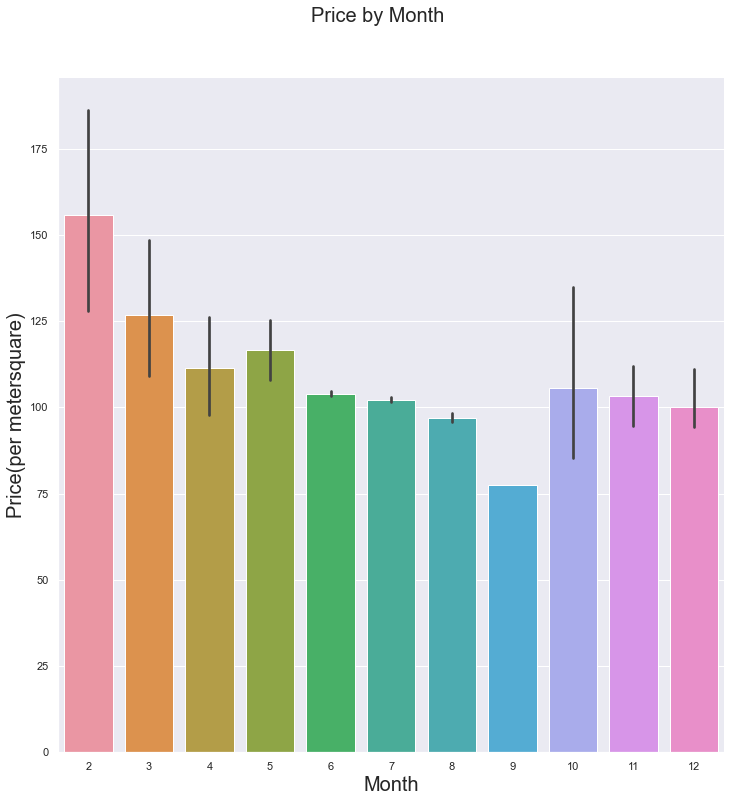

In [42]:
plot = sns.catplot(data=df, kind="bar", x="Month", y="Price", height = 10)

plot.fig.suptitle("Price by Month", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Month", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

### The Housing Type Price in 2019 and 2020

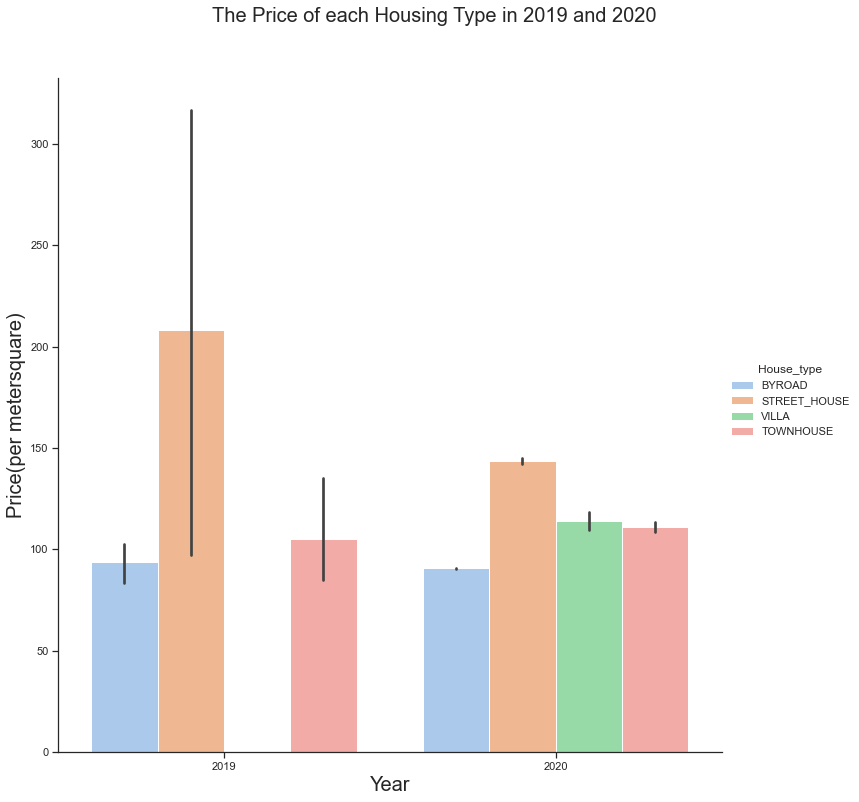

In [43]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="Year", y="Price", hue="House_type", height = 10)
plot.fig.suptitle("The Price of each Housing Type in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

### Summary
***
Overall, The price house in 2020 has show a significant upward trend, the Villa house has the higest price while the lane house has the lowest price. In a year, the April has the higest price out of 12 months. And now, the next target is to determine the best location for buying a plot.

### Distribution (Proportion) of Urban and Suburban

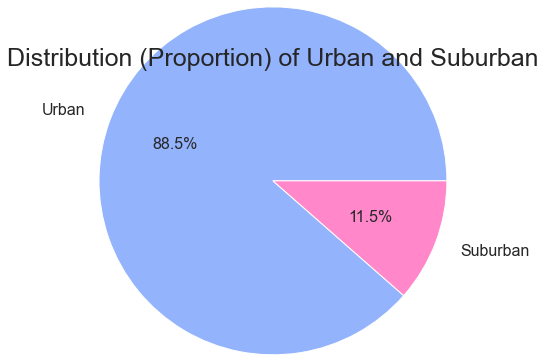

In [44]:
# Pie chart
labels = ['Urban', 'Suburban']
#colors
colors = ['#94B3FD', '#FF87CA']
 
plt.pie(df['isUrban'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', radius=2, textprops={'fontsize': 16});
plt.ylabel('')
plt.title('Distribution (Proportion) of Urban and Suburban', fontsize=25)
plt.show()

**Description** Most of the plot is in Urban

### The Housing Type Price in Urban and Suburban from 2019 to 2020

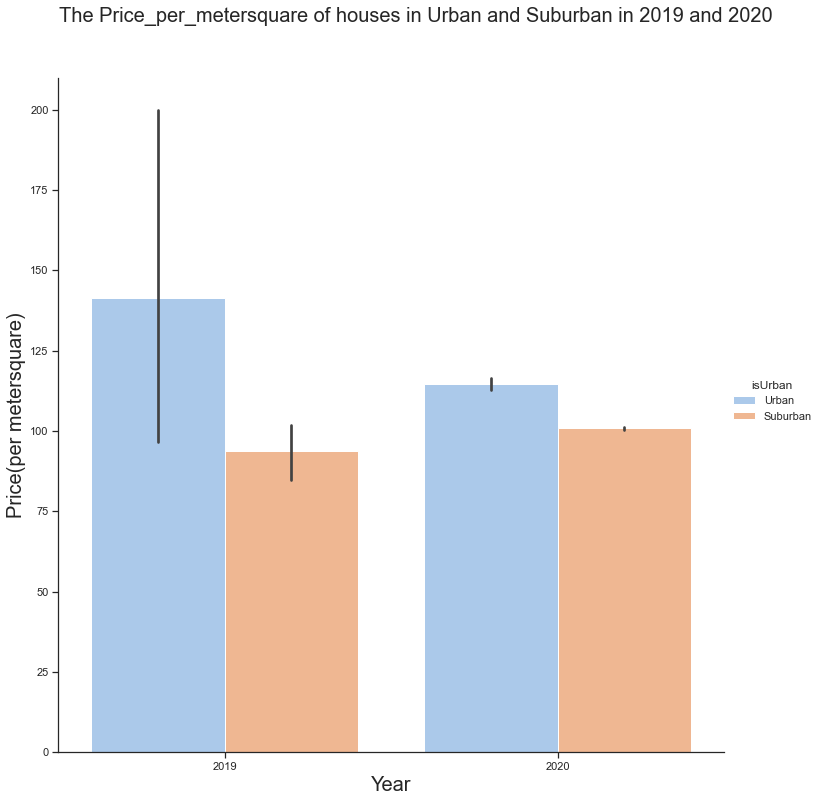

In [45]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="Year", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

price in Suburban is higher than the urban??? 

### The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020

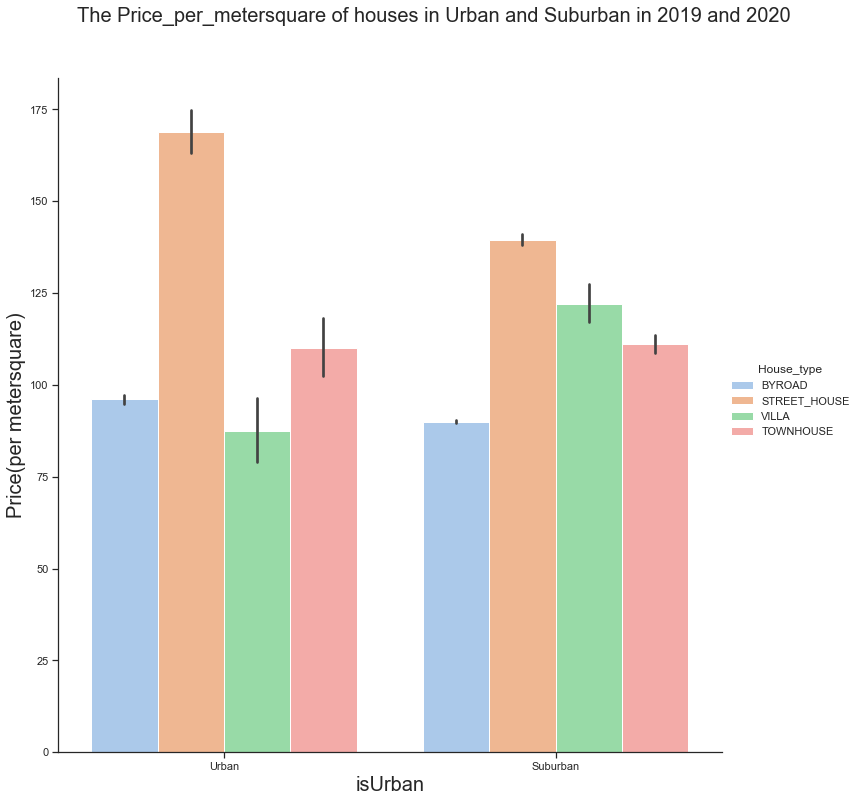

In [46]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="isUrban", y="Price", hue="House_type", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("isUrban", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

price in Suburban is higher than the urban and the Adjacent townhouses is highest?

### The Distribution of Legal Document and in Urban and Suburban in 2019 and 2020

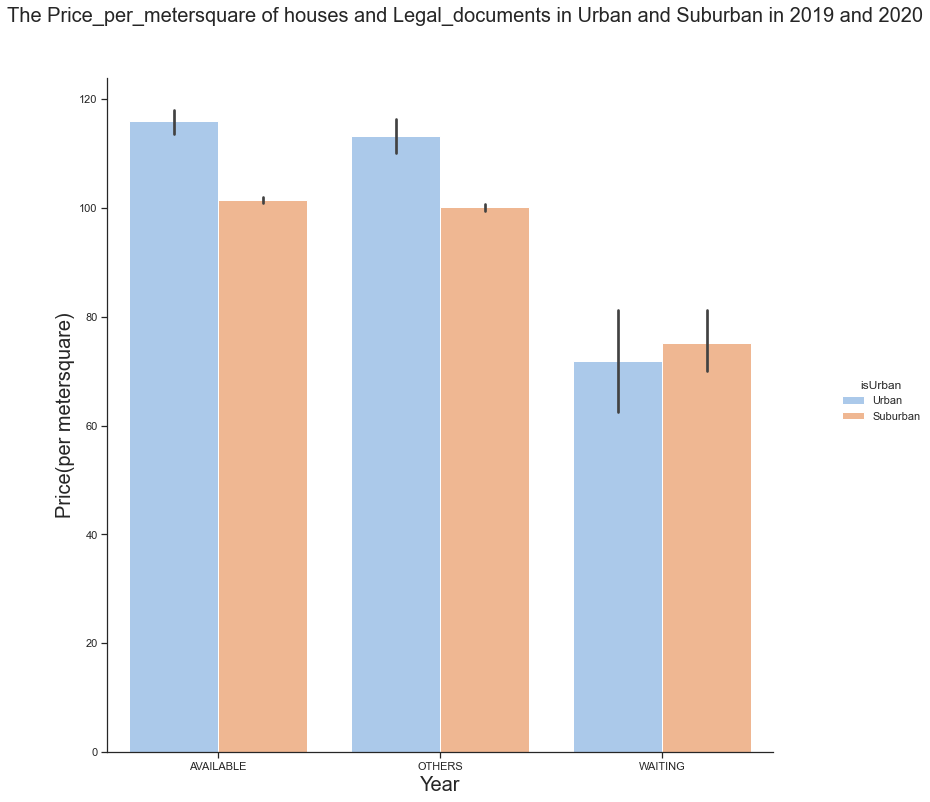

In [47]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="Legal_documents", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses and Legal_documents in Urban and Suburban in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

The plot already had registration book has higher price -> good point

### The Price_per_metersquare of each housing types in urban and suburban

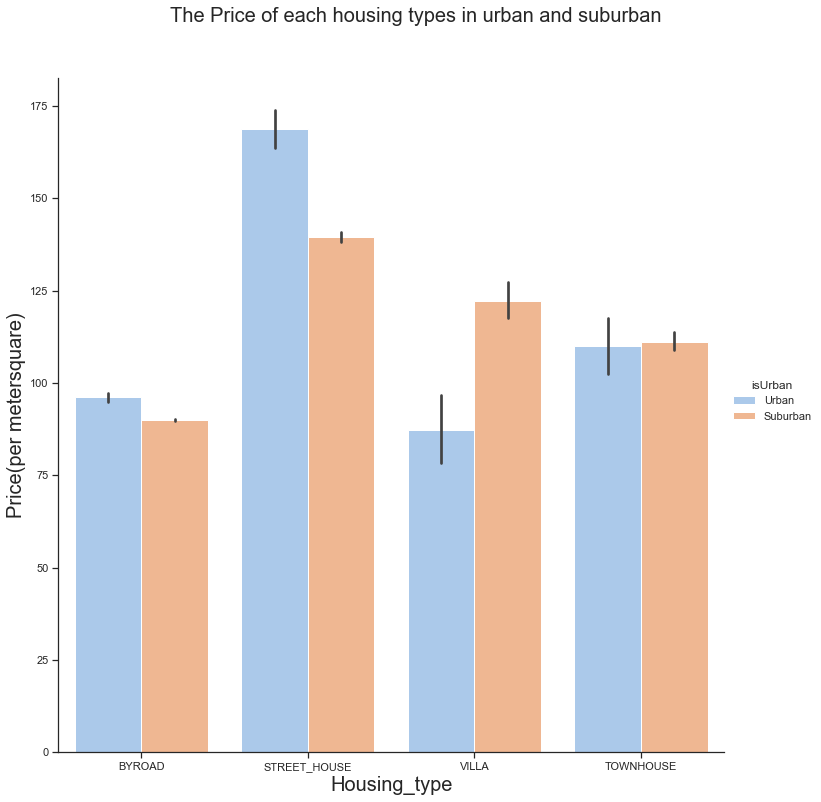

In [48]:
sns.set_theme(style="ticks", palette="pastel") #choose pastel color
plot = sns.catplot(data=df, kind="bar", x="House_type", y="Price", hue="isUrban", height = 10)
plot.fig.suptitle("The Price of each housing types in urban and suburban", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Housing_type", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

### Safety factors in urban and suburban

In [49]:
# the under 18 years old should not have more than 5 years code 
options = ['AVAILABLE']
floor = ['GREATER_THAN_10', '9', '10']
            
# selecting rows based on condition the number of 'YearsCode' is larger than 5
#reconfirm the condition again
rslt_df = df[(df['Legal_documents'].isin(options)) & (df['Area'] > 30) & (~df['No_floor'].isin(floor)) & 
             (df['Price'] >= 495.000)]
# rslt_df = df[(df['Price'] > 495.000)]
rslt_df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year,Street,isUrban,isSafe
1124,HAI BÀ TRƯNG,VĨNH TUY,BYROAD,AVAILABLE,5,2,51.0,12.0,4.0,833.33,TUESDAY,8,2020,YÊN LẠC,Suburban,False
1443,TÂY HỒ,QUẢNG AN,VILLA,AVAILABLE,5,GREATER_THAN_10,130.0,19.3,6.0,553.85,TUESDAY,8,2020,ĐƯỜNG QUẢNG AN,Suburban,False
1745,NAM TỪ LIÊM,MỸ ĐÌNH 1,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,800.0,TUESDAY,8,2020,ĐƯỜNG LÊ ĐỨC THỌ,Suburban,False
1835,BA ĐÌNH,KIM MÃ,STREET_HOUSE,AVAILABLE,5,GREATER_THAN_10,102.0,15.5,5.75,509.8,TUESDAY,8,2020,ĐƯỜNG KIM MÃ,Suburban,False
1843,ĐỐNG ĐA,KIM LIÊN,BYROAD,AVAILABLE,5,6,40.0,10.0,4.0,812.5,TUESDAY,8,2020,ĐƯỜNG LÊ DUẨN,Suburban,False
4301,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,5,6,50.0,12.0,4.5,920.0,MONDAY,8,2020,27,Urban,False
4386,BA ĐÌNH,ĐIỆN BIÊN,STREET_HOUSE,AVAILABLE,4,3,31.0,10.0,3.0,516.13,MONDAY,8,2020,ĐƯỜNG ĐIỆN BIÊN PHỦ,Suburban,False
8157,ĐỐNG ĐA,Ô CHỢ DỪA,STREET_HOUSE,AVAILABLE,8,6,80.0,18.0,4.5,575.0,FRIDAY,7,2020,XÃ ĐÀN,Suburban,False
8360,HAI BÀ TRƯNG,VĨNH TUY,BYROAD,AVAILABLE,5,3,33.0,9.0,4.0,939.39,FRIDAY,7,2020,ĐƯỜNG MINH KHAI,Suburban,False
8366,ĐỐNG ĐA,NAM ĐỒNG,STREET_HOUSE,AVAILABLE,8,5,55.0,12.0,8.0,518.18,FRIDAY,7,2020,ĐƯỜNG NAM ĐỒNG,Suburban,False


Text(0, 0.5, '')

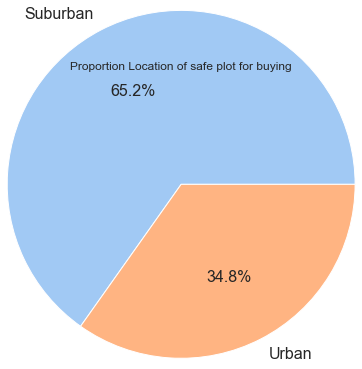

In [50]:
rslt_df['isUrban'].value_counts().plot.pie(title="Proportion Location of safe plot for buying", legend=False, \
                                      autopct='%1.1f%%', startangle=0, radius=2, textprops={'fontsize': 16})
plt.ylabel('')

In [51]:
y

NameError: name 'y' is not defined

### Summary
The house price in suburban and urban is remarably different and the price in suburban is condierably higher, but the safety factor in urban is higher -> optimised option is buy home in urban???

## 3b. District
***
### The Price_per_metersquare of houses in some district in urban from 2019 to 2020

In [ ]:
urban = ['Dong Da District', 'Thanh Xuan District', 'Hoang Mai District',  'Hai Ba Trung District', 'Ha Dong District',
         'Cau Giay District', 'Ba Dinh District', 'Long Bien District', 'Nam Tu Liem District', 'Tay Ho District',
         'Bac Tu Liem District', 'Hoan Kiem District']

#reconfirm the condition again
urban_price = df[(df['District'].isin(urban))]

In [ ]:
plot = sns.catplot(data=urban_price, kind="bar", x="Year", y="Price", hue="District", height = 10)
plot.fig.suptitle("The Price of houses in some district in urban from 2019 to 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price(per metersquare)", fontsize = 20)

### The proportion housing type of Ideal option

In [ ]:
# the under 18 years old should not have more than 5 years code 
options = ['Already had registration book']

urban = ['Dong Da District', 'Long Bien District']

# selecting rows based on condition the number of 'YearsCode' is larger than 5
#reconfirm the condition again
ideal = df[(df['Legal_documents'].isin(options)) & (df['Area'] > 30) & (df['Number_of_floor'] <= 8) & 
             (df['Price'] >= 495000) & (df['isUrban'] == True)]
ideal

In [ ]:
ideal['House_type'].value_counts().plot.pie(title="House_type", legend=False, \
                                      autopct='%1.1f%%', startangle=0)
plt.ylabel('')

# Part 4: Statistical Overview
***